# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df = pd.read_csv("D:\\instagram_reach.csv")

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [9]:
df.shape

(100, 8)

In [8]:
int(df["Time since posted"][0][0:2])

11

# Data Cleaning 

In [11]:
time = []
for i in range(100):
    time.append(int(df["Time since posted"][i][0:2]))

In [13]:
df["Time_since_posted"] = time

In [14]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Time_since_posted
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3


# Dropping extra columns

In [22]:
df1 = df.drop(["Unnamed: 0","S.No","USERNAME","Caption","Hashtags","Time since posted"],axis = "columns")

In [23]:
df1.head()

,Followers,Likes,Time_since_posted
0,1600,139,11
1,880,23,2
2,255,25,2
3,340,49,3
4,304,30,3


In [24]:
df1.shape

(100, 3)

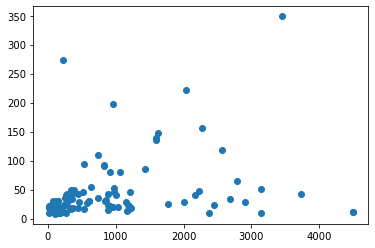

In [25]:
plt.scatter(df1.Followers,df1.Likes)

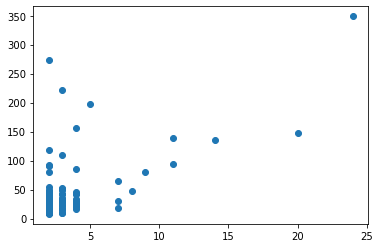

In [26]:
plt.scatter(df1.Time_since_posted,df1.Likes)

# Defining x and y variables

In [30]:
x = df1[["Followers","Time_since_posted"]]
y = df1[["Likes"]]

# Splitting the dataset with 20% test data size

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Applying Linear Regression model on the train dataset

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
regressor.score(x_test,y_test)

0.6183678779549548

In [36]:
y_predicted = regressor.predict(x_test)

# Calculating MSE

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)

In [38]:
mse

541.0121910944124